In [1]:
import numpy as np
import torch

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"

In [2]:
def plot_output_space(algo, metric, seed, title):
    output_path = f"data/dtlz2_{dim}/{str(seed+1).zfill(4)}_{algo}_{metric}.pt"
    data = torch.load(output_path)
    X = data["X"]
    Y = data["Y"]

    n0 = num_initial_points
    n = num_iterations
    colors = pl.cm.viridis(np.linspace(0, 1, n))
    plt.scatter(Y[:n0, 0], Y[:n0, 1], color="k")
    plt.scatter(Y[n0 : n0 + n, 0], Y[n0 : n0 + n, 1], c=colors)

    plt.xlabel(r"$y^{(1)}$", fontsize=25)
    plt.ylabel(r"$y^{(2)}$", fontsize=25)
    plt.title(title, fontsize=30)
    plt.xlim(-2, 0.2)
    plt.ylim(-2, 0.2)
    plt.yticks([])
    plt.xticks([])

    return None

In [3]:
dim = 8
num_initial_points = 2 * (dim + 1)
num_iterations = 100

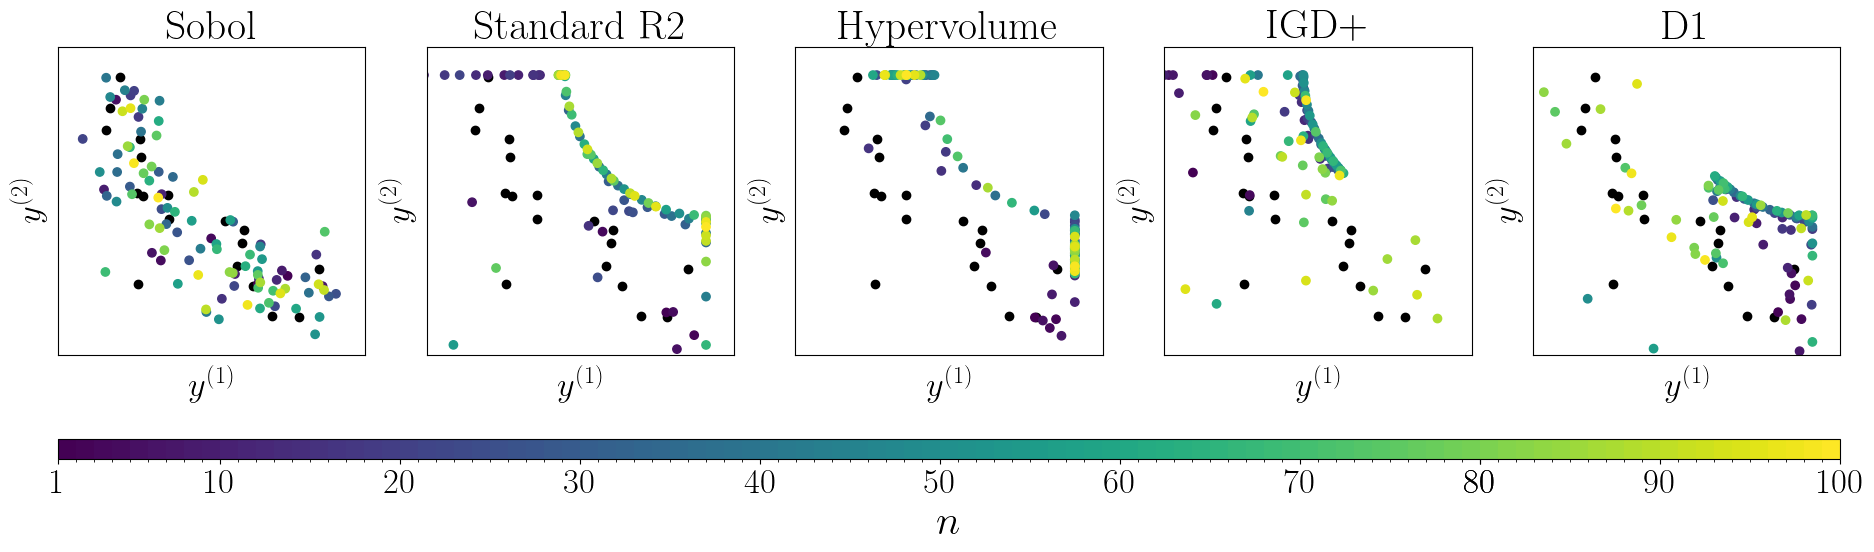

In [4]:
fig, axes = plt.subplots(1, 5, figsize=(23, 4))

seed = 20

# sobol
plt.subplot(1, 5, 1)
plot_output_space(algo="sobol", metric="hv", title="Sobol", seed=seed)

# hv
plt.subplot(1, 5, 3)
plot_output_space(algo="eui", metric="hv", title="Hypervolume", seed=seed)

# igd
plt.subplot(1, 5, 4)
plot_output_space(algo="eui", metric="igd", title="IGD+", seed=seed)

# d1
plt.subplot(1, 5, 5)
plot_output_space(algo="eui", metric="d1", title=r"D1", seed=seed)

# r2
plt.subplot(1, 5, 2)
plot_output_space(algo="eui", metric="r2", title=r"Standard R2", seed=seed)


cmap = plt.cm.viridis
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "custom_cmap", cmaplist, cmap.N
)
bounds = np.linspace(1, 100, 100)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
ax_bar = fig.add_axes([0.125, -0.15, 0.775, 0.05])
cbar = matplotlib.colorbar.ColorbarBase(
    ax_bar,
    cmap=cmap,
    norm=norm,
    spacing="proportional",
    ticks=bounds + 0.5,
    boundaries=bounds,
    format="%1i",
    orientation="horizontal",
)
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 80, 90, 100], fontsize=25)
plt.xlabel(r"$n$", fontsize=30)
plt.show()